In [1]:
import numpy as np
import tensorflow as tf



In [2]:
print('Hello world')

Hello world


In [3]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

Hello, TensorFlow!


In [3]:
#random seed determines the sequence start point

np.random.seed(12)
print(np.random.randint(0,1000))

np.random.seed(10)
print(np.random.randint(0,1000))

np.random.seed(12)
print(np.random.randint(0,1000))



843
265
843


In [4]:
#random seed set to time
import time

sdd = int(time.time())

np.random.seed(sdd)

rad = np.random.randint(0,1000)

print(sdd,rad)



1522145447 841


In [6]:


trainx = []
trainy = []

datacount= 1000

seed_start = 0 

for i in range(datacount):
    #sdd = int(time.time())
    sdd = seed_start + i
    np.random.seed(sdd)
    
    #rad = np.random.randint(-2**31,2**31)
    
    rad = np.random.randn()    #np.random.randint(0,10)
    
    trainx.append(sdd)
    trainy.append(rad)



In [28]:
print(len(trainx))
print(len(trainy))

1000
1000


In [38]:
import matplotlib.pyplot as plt

train_X = np.asarray(trainx[0:500])
train_Y = np.asarray(trainy[0:500])

test_X = np.asarray(trainx[500:])
test_Y = np.asarray(trainy[500:])

xmax = max(train_X)
stdx = np.std(train_X)

#ymax = max(train_Y)
#stdy = np.std(train_Y)

train_X = (train_X - xmax) / stdx
#train_Y = (train_Y - ymax) / stdy


print(xmax)
print(stdx)

499
144.337278622


In [9]:
rng = np.random

# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 10

n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn()/100, name="weight")
b = tf.Variable(rng.randn()/100, name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training

sess = tf.Session()


# Run the initializer
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')



('Epoch:', '0010', 'cost=', '1.097990990', 'W=', 0.22283655, 'b=', -0.12321588)
('Epoch:', '0020', 'cost=', '0.844864547', 'W=', 0.35264105, 'b=', -0.21384354)
('Epoch:', '0030', 'cost=', '0.743532717', 'W=', 0.42870852, 'b=', -0.27940282)
('Epoch:', '0040', 'cost=', '0.700409412', 'W=', 0.47158682, 'b=', -0.32924089)
('Epoch:', '0050', 'cost=', '0.679674089', 'W=', 0.49398932, 'b=', -0.36915165)
('Epoch:', '0060', 'cost=', '0.667625785', 'W=', 0.50379932, 'b=', -0.40272692)
('Epoch:', '0070', 'cost=', '0.659034610', 'W=', 0.50588655, 'b=', -0.43219253)
('Epoch:', '0080', 'cost=', '0.651905477', 'W=', 0.50328773, 'b=', -0.45893359)
('Epoch:', '0090', 'cost=', '0.645478010', 'W=', 0.49785697, 'b=', -0.4838109)
('Epoch:', '0100', 'cost=', '0.639459670', 'W=', 0.49074081, 'b=', -0.5073632)
('Epoch:', '0110', 'cost=', '0.633739889', 'W=', 0.48267448, 'b=', -0.5299201)
('Epoch:', '0120', 'cost=', '0.628267527', 'W=', 0.47409043, 'b=', -0.55171037)
('Epoch:', '0130', 'cost=', '0.623019934', 

('Epoch:', '1050', 'cost=', '0.502569914', 'W=', 0.079568751, 'b=', -1.415331)
('Epoch:', '1060', 'cost=', '0.502461553', 'W=', 0.078193501, 'b=', -1.4183198)
('Epoch:', '1070', 'cost=', '0.502357304', 'W=', 0.07684762, 'b=', -1.4212569)
('Epoch:', '1080', 'cost=', '0.502257407', 'W=', 0.075529054, 'b=', -1.4241325)
('Epoch:', '1090', 'cost=', '0.502161860', 'W=', 0.074235894, 'b=', -1.4269376)
('Epoch:', '1100', 'cost=', '0.502070189', 'W=', 0.072970927, 'b=', -1.4296827)
('Epoch:', '1110', 'cost=', '0.501982391', 'W=', 0.071734689, 'b=', -1.4323702)
('Epoch:', '1120', 'cost=', '0.501898348', 'W=', 0.070523672, 'b=', -1.4349954)
('Epoch:', '1130', 'cost=', '0.501817763', 'W=', 0.069340326, 'b=', -1.4375679)
('Epoch:', '1140', 'cost=', '0.501740158', 'W=', 0.068180449, 'b=', -1.440097)
('Epoch:', '1150', 'cost=', '0.501665890', 'W=', 0.067042381, 'b=', -1.442569)
('Epoch:', '1160', 'cost=', '0.501595140', 'W=', 0.06593065, 'b=', -1.4449707)
('Epoch:', '1170', 'cost=', '0.501527071', 'W

In [10]:
#trainx[1:5]

un = np.unique(trainx)

print(un.shape)


(10000,)


In [46]:
testxx = test_X / xmax
testyy = test_Y / xmax


pred_y = sess.run(pred, feed_dict={X: testxx})

print(testyy[0:5])
print(pred_y[0:5])

In [11]:
pred_y_tra = sess.run(pred, feed_dict={X: train_X})

print(train_Y[0:5])
print(pred_y_tra[0:5])


[-1.39946816 -1.39946816 -0.34986704 -0.34986704 -0.69973408]
[-1.61727488 -1.61725938 -1.61724377 -1.61722827 -1.61721277]


In [14]:
difr = sum(pow(pred_y_tra - train_Y,2))

print(difr)

4999.70163939


In [33]:
# lets try a fc model with two layers

X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(rng.randn(1,16)/100, name="weight1",dtype="float")
b1 = tf.Variable(rng.randn(16)/100, name="bias1",dtype="float")

fc1 = tf.nn.relu(tf.matmul(X, W1) + b1)       #out1 = tf.add(tf.multiply(X, W1), b1)


W2 = tf.Variable(rng.randn(16,1)/100, name="weight2",dtype="float")
b2 = tf.Variable(rng.randn(1)/100, name="bias2",dtype="float")

pred = tf.matmul(fc1, W2) + b2                  #pred = tf.nn.relu(tf.matmul(X, W1) + b1)


cost      = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x.reshape([1,1]), Y: y.reshape([1,1])})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X.reshape([500,1]), Y:train_Y.reshape([500,1])})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X.reshape([500,1]), Y: train_Y.reshape([500,1])})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')



('Epoch:', '0010', 'cost=', '0.559549034', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0020', 'cost=', '0.549402237', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0030', 'cost=', '0.539462447', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0040', 'cost=', '0.529723465', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0050', 'cost=', '0.520180285', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0060', 'cost=', '0.510828078', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0070', 'cost=', '0.501661956', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0080', 'cost=', '0.492678285', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0090', 'cost=', '0.483873338', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0100', 'cost=', '0.475242734', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0110', 'cost=', '0.466782123', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '0120', 'cost=', '0.458487242', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Ep

('Epoch:', '1000', 'cost=', '0.084407061', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1010', 'cost=', '0.082930349', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1020', 'cost=', '0.081523940', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1030', 'cost=', '0.080185384', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1040', 'cost=', '0.078914762', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1050', 'cost=', '0.077710204', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1060', 'cost=', '0.076569118', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1070', 'cost=', '0.075490378', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1080', 'cost=', '0.074470729', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1090', 'cost=', '0.073509060', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1100', 'cost=', '0.072604239', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '1110', 'cost=', '0.071753994', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Ep

('Epoch:', '1990', 'cost=', '0.058094226', 'W=', 0.0061310949, 'b=', 0.0075604031)
('Epoch:', '2000', 'cost=', '0.058058154', 'W=', 0.0061310949, 'b=', 0.0075604031)
Optimization Finished!
('Training cost=', 0.058058154, 'W=', 0.0061310949, 'b=', 0.0075604031, '\n')


In [40]:
pred_y_tra = sess.run(pred, feed_dict={X: train_X.reshape([500,1])})

print(train_Y[0:5])
print(pred_y_tra[0:5])

[ 1.76405235  1.62434536 -0.41675785  1.78862847  0.05056171]
[[-3.66328764]
 [-3.66102695]
 [-3.65876627]
 [-3.65650535]
 [-3.65424442]]


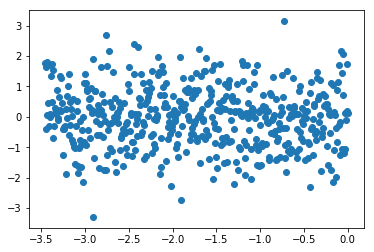

In [39]:
import matplotlib.pyplot as plt

plt.scatter(train_X,train_Y)
plt.show()

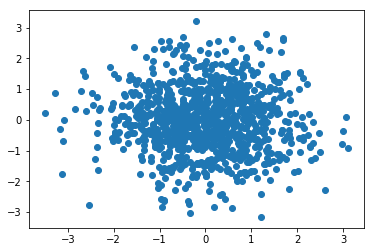

In [42]:
plt.scatter(rng.randn(1,1000),rng.randn(1,1000))
plt.show()

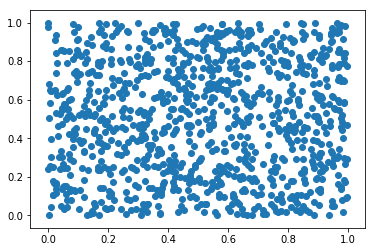

In [43]:
plt.scatter(rng.rand(1,1000),rng.rand(1,1000))
plt.show()